<a href="https://colab.research.google.com/github/Adrxking/colabs/blob/main/Churn_Neuronal_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam, RMSprop, SGD, Adagrad
from keras.callbacks import LearningRateScheduler
import numpy as np
import seaborn as sn
from sklearn.preprocessing import LabelEncoder

# Preparación de los datos

In [3]:
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/churn.csv')
print(len(df))
df.head().T

7043


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Guardamos todos los charges en numérico
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')
# Convertimos los charges en numéricos y rellenamos los na con 0
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)
# En base a todos los charges iniciales que estaban a null comprobamos que valor tienen ahora
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,0.0
753,3115-CZMZD,0.0
936,5709-LVOEQ,0.0
1082,4367-NUYAO,0.0
1340,1371-DWPAZ,0.0
3331,7644-OMVMY,0.0
3826,3213-VVOLG,0.0
4380,2520-SGTTA,0.0
5218,2923-ARZLG,0.0
6670,4075-WKNIU,0.0


In [6]:
replacer = lambda str: str.lower().str.replace(' ', '_')
df.columns = replacer(df.columns.str)
for col in list(df.dtypes[df.dtypes == 'object'].index):
    df[col] = replacer(df[col].str)
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
df.churn = (df.churn == 'yes').astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [8]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
                'phoneservice', 'multiplelines', 'internetservice',
                'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport', 'streamingtv', 'streamingmovies',
                'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=1)
y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

df_train.head().T

,4204,7034,5146,5184,1310
customerid,4395-pzmsn,0639-tsiqw,3797-fkogq,7570-welny,6393-wryze
gender,male,female,male,female,female
seniorcitizen,1,0,0,0,0
partner,no,no,no,yes,yes
dependents,no,no,yes,no,no
tenure,5,67,11,68,34
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,yes,yes,yes,yes
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,fiber_optic
onlinesecurity,no,yes,no,yes,no


# Análisis de la importancia de las propiedades

In [10]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [11]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print(round(female_mean, 3))
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print(round(male_mean, 3))

0.277
0.263


In [12]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print(round(partner_yes, 3))
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print(round(partner_no, 3))

0.205
0.33


In [13]:
from sklearn.metrics import mutual_info_score

calculate_mi = lambda col: mutual_info_score(col, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [14]:
print(df_train_full[numerical].corrwith(df_train_full.churn))

print(round(df_train_full[df_train_full.tenure <= 2].churn.mean(), 3))
print(round(df_train_full[(df_train_full.tenure > 3) & 
                          (df_train_full.tenure <= 12)].churn.mean(), 3))
print(round(df_train_full[df_train_full.tenure > 12].churn.mean(), 3))

print(round(df_train_full[df_train_full.monthlycharges < 20].churn.mean(), 3))
print(round(df_train_full[(df_train_full.monthlycharges > 21) & 
                          (df_train_full.monthlycharges <= 50)].churn.mean(), 3))
print(round(df_train_full[df_train_full.monthlycharges > 50].churn.mean(), 3))

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64
0.595
0.391
0.176
0.088
0.223
0.325


# Ingeniería de propiedades

In [15]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dict(sorted(train_dict[0].items()))

{'contract': 'month-to-month',
 'dependents': 'no',
 'deviceprotection': 'no',
 'gender': 'male',
 'internetservice': 'fiber_optic',
 'monthlycharges': 85.55,
 'multiplelines': 'no',
 'onlinebackup': 'yes',
 'onlinesecurity': 'no',
 'paperlessbilling': 'yes',
 'partner': 'no',
 'paymentmethod': 'electronic_check',
 'phoneservice': 'yes',
 'seniorcitizen': 1,
 'streamingmovies': 'yes',
 'streamingtv': 'no',
 'techsupport': 'no',
 'tenure': 5,
 'totalcharges': 408.5}

In [16]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [17]:
X_train = dv.transform(train_dict)
X_train[0]

array([  1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   1.  ,   0.  ,  85.55,   1.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,   0.  ,
         1.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   1.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   0.  ,   5.  , 408.5 ])

In [18]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

# Entrenamiento del modelo

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [20]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)
y_pred

array([[0.99142714, 0.00857286],
       [0.79028712, 0.20971288],
       [0.78364454, 0.21635546],
       ...,
       [0.35664296, 0.64335704],
       [0.81055916, 0.18944084],
       [0.87261929, 0.12738071]])

In [21]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00857286, 0.20971288, 0.21635546, ..., 0.64335704, 0.18944084,
       0.12738071])

In [22]:
churn = y_pred >= 0.5
churn

array([False, False, False, ...,  True, False, False])

In [23]:
# precisión del modelo con los datos de entrenamiento
round((y_val == churn).mean(), 3) 

0.805

# Modelo

In [ ]:
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)
y_pred

# Red Neuronal

## Preparación de los datos

In [76]:
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/churn.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
# Guardamos todos los charges en numérico
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')
# Convertimos los charges en numéricos y rellenamos los na con 0
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)
# En base a todos los charges iniciales que estaban a null comprobamos que valor tienen ahora
df[total_charges.isnull()][['customerID', 'TotalCharges']]

In [78]:
replacer = lambda str: str.lower().str.replace(' ', '_')
df.columns = replacer(df.columns.str)
for col in list(df.dtypes[df.dtypes == 'object'].index):
    df[col] = replacer(df[col].str)
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [79]:
df.churn = (df.churn == 'yes').astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [80]:
# Clasificar en categóricos
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
                'phoneservice', 'multiplelines', 'internetservice',
                'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport', 'streamingtv', 'streamingmovies',
                'contract', 'paperlessbilling', 'paymentmethod']
# Clasificar en numéricos
numerical = ['tenure', 'monthlycharges', 'totalcharges']
# Mostrar cuántos valores diferentes tiene cada categoría
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Análisis de la importancia de las propiedades

In [81]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['partner'] = le.fit_transform(df['partner'])
df['dependents'] = le.fit_transform(df['dependents'])
df['phoneservice'] = le.fit_transform(df['phoneservice'])
df['paymentmethod'] = le.fit_transform(df['paymentmethod'])
df['paperlessbilling'] = le.fit_transform(df['paperlessbilling'])
df['contract'] = le.fit_transform(df['contract'])
df['streamingmovies'] = le.fit_transform(df['streamingmovies'])
df['streamingtv'] = le.fit_transform(df['streamingtv'])
df['techsupport'] = le.fit_transform(df['techsupport'])
df['deviceprotection'] = le.fit_transform(df['deviceprotection'])
df['onlinebackup'] = le.fit_transform(df['onlinebackup'])
df['onlinesecurity'] = le.fit_transform(df['onlinesecurity'])
df['internetservice'] = le.fit_transform(df['internetservice'])
df['multiplelines'] = le.fit_transform(df['multiplelines'])

<ipython-input-82-86ab15935bb6>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


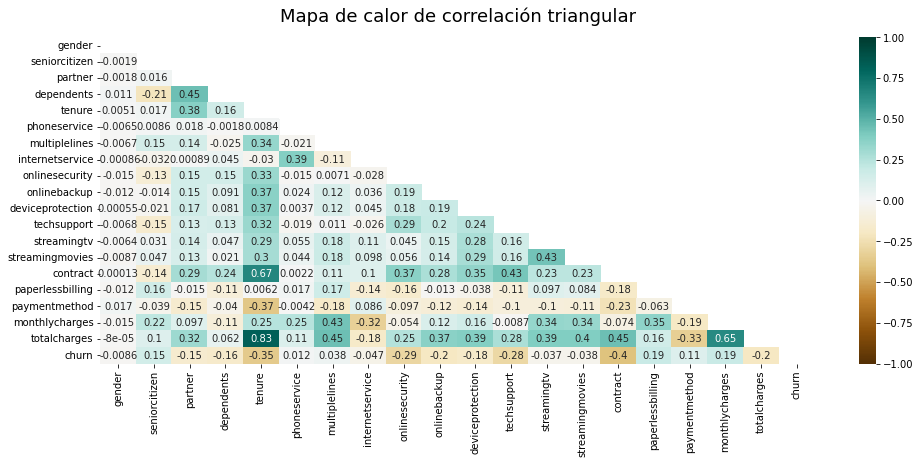

In [82]:
np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sn.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de calor de correlación triangular', fontdict={'fontsize':18}, pad=16);

In [177]:
df_filtered = df.drop(['gender', 'multiplelines', 'internetservice', 'streamingtv', 'streamingmovies', 'customerid'], axis=1)
df_filtered2 = df.drop(['gender', 'multiplelines', 'internetservice', 'streamingtv', 'streamingmovies', 'customerid', 'tenure'], axis=1)

churn_dummies = pd.get_dummies(df_filtered['churn'], prefix='churn')
# Concatenar los nuevos datos binarios con el dataframe original
df_filtered3 = pd.concat([df_filtered, churn_dummies], axis=1)
# Eliminar la columna original 'churn'
df_filtered3 = df_filtered3.drop('churn', axis=1)
df_filtered3.head().T

,0,1,2,3,4
seniorcitizen,0.00,0.00,0.00,0.00,0.00
partner,1.00,0.00,0.00,0.00,0.00
dependents,0.00,0.00,0.00,0.00,0.00
tenure,1.00,34.00,2.00,45.00,2.00
phoneservice,0.00,1.00,1.00,0.00,1.00
onlinesecurity,0.00,2.00,2.00,2.00,0.00
onlinebackup,2.00,0.00,2.00,0.00,0.00
deviceprotection,0.00,2.00,0.00,2.00,0.00
techsupport,0.00,0.00,0.00,2.00,0.00
contract,0.00,1.00,0.00,1.00,0.00


# Entrenamiento del modelo

In [178]:
from sklearn.model_selection import train_test_split
df_filtered_train, df_filtered_test = train_test_split(df_filtered, test_size=0.2, random_state=1)

x_train = df_filtered_train.drop('churn', axis=1)
y_train = df_filtered_train['churn']

x_test = df_filtered_test.drop('churn', axis=1)
y_test = df_filtered_test['churn']

df_filtered_train2, df_filtered_test2 = train_test_split(df_filtered2, test_size=0.2, random_state=1)

x_train2 = df_filtered_train2.drop('churn', axis=1)
y_train2 = df_filtered_train2['churn']

x_test2 = df_filtered_test2.drop('churn', axis=1)
y_test2 = df_filtered_test2['churn']

df_filtered_train3, df_filtered_test3 = train_test_split(df_filtered3, test_size=0.2, random_state=1)

x_train3 = df_filtered_train3.drop(['churn_0', 'churn_1'], axis=1)
y_train3 = df_filtered_train3[['churn_0', 'churn_1']]

x_test3 = df_filtered_test3.drop(['churn_0', 'churn_1'], axis=1)
y_test3 = df_filtered_test3[['churn_0', 'churn_1']]


x_train3.head().T

,1814,5946,3881,2389,3676
seniorcitizen,0.00,0.00,0.00,0.00,0.00
partner,1.00,0.00,1.00,1.00,0.00
dependents,1.00,0.00,0.00,1.00,0.00
tenure,12.00,42.00,71.00,71.00,30.00
phoneservice,1.00,1.00,1.00,1.00,1.00
onlinesecurity,1.00,2.00,2.00,2.00,2.00
onlinebackup,1.00,2.00,2.00,0.00,2.00
deviceprotection,1.00,2.00,0.00,2.00,0.00
techsupport,1.00,2.00,2.00,2.00,2.00
contract,2.00,1.00,2.00,1.00,1.00


#### ADAM - 1 SALIDA

In [135]:
model = Sequential()
model.add(Dense(8, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [136]:
learning_rate = 0.009
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [137]:
x_train = x_train.astype('float32')

In [ ]:
# fit the keras model on the dataset
history = model.fit(x_train, y_train, epochs=500, batch_size=300)

In [107]:
# evaluate the keras model
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

45/45 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8133
Accuracy: 81.33


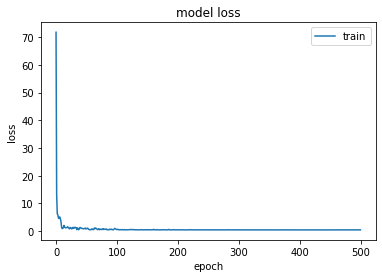

In [74]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

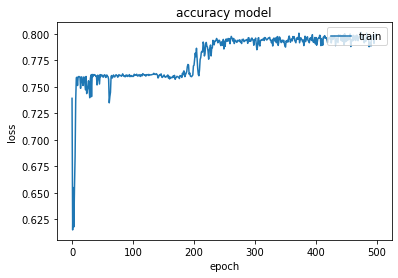

In [108]:
plt.plot(history.history['accuracy'])
plt.title('accuracy model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

#### ADAM - 2 SALIDAS

In [222]:
model = Sequential()
model.add(Dense(16, input_shape=(x_train3.shape[1],), activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [223]:
learning_rate = 0.008
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [224]:
x_train3 = x_train3.astype('float32')

In [ ]:
# fit the keras model on the dataset
history = model.fit(x_train3, y_train3, epochs=500, batch_size=300)

In [226]:
from sklearn.metrics import accuracy_score

y_pred3 = model.predict(x_test3)

pred_index = np.argmax(y_pred3, axis=1)

# Seleccionar la columna correspondiente como la predicción final
y_pred_final = np.zeros((len(y_pred3), 2))
y_pred_final[pred_index == 0, 0] = 1
y_pred_final[pred_index == 1, 1] = 1

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test3, y_pred_final)

# Imprimir el resultado
print('Accuracy: %.2f' % (accuracy*100))

45/45 [==============================] - 0s 3ms/step
Accuracy: 80.62


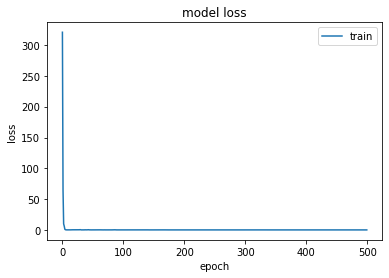

In [220]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

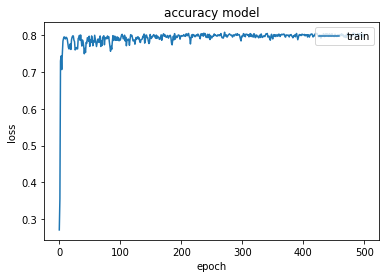

In [221]:
plt.plot(history.history['accuracy'])
plt.title('accuracy model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

#### ADAM - 1 SALIDA - Filtered2

In [165]:
model = Sequential()
model.add(Dense(3, input_shape=(x_train2.shape[1],), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [166]:
learning_rate = 0.009
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [167]:
x_train2 = x_train2.astype('float32')

In [ ]:
# fit the keras model on the dataset
history = model.fit(x_train2, y_train2, epochs=500, batch_size=300)

In [169]:
# evaluate the keras model
_, accuracy = model.evaluate(x_test2, y_test2)
print('Accuracy: %.2f' % (accuracy*100))

45/45 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8013
Accuracy: 80.13


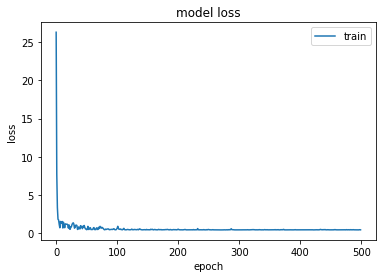

In [170]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

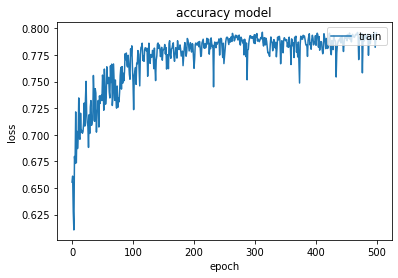

In [171]:
plt.plot(history.history['accuracy'])
plt.title('accuracy model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

#### RMSprop - 1 SALIDA

In [139]:
model = Sequential()
model.add(Dense(8, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [140]:
learning_rate = 0.009
optimizer = RMSprop(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [141]:
x_train = x_train.astype('float32')

In [142]:
# fit the keras model on the dataset
history = model.fit(x_train, y_train, epochs=500, batch_size=300)

Epoch 1/500
19/19 [==============================] - 1s 4ms/step - loss: 42.0236 - accuracy: 0.6589
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 11.7099 - accuracy: 0.6496
Epoch 3/500
19/19 [==============================] - 0s 4ms/step - loss: 9.5750 - accuracy: 0.6615
Epoch 4/500
19/19 [==============================] - 0s 4ms/step - loss: 11.5278 - accuracy: 0.6581
Epoch 5/500
19/19 [==============================] - 0s 4ms/step - loss: 6.9451 - accuracy: 0.6656
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 5.2135 - accuracy: 0.6647
Epoch 7/500
19/19 [==============================] - 0s 5ms/step - loss: 4.8479 - accuracy: 0.6837
Epoch 8/500
19/19 [==============================] - 0s 4ms/step - loss: 7.1297 - accuracy: 0.6605
Epoch 9/500
19/19 [==============================] - 0s 4ms/step - loss: 5.2248 - accuracy: 0.7004
Epoch 10/500
19/19 [==============================] - 0s 4ms/step - loss: 4.4652 - accuracy: 0.6777
Epoch 

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

45/45 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8133
Accuracy: 81.33


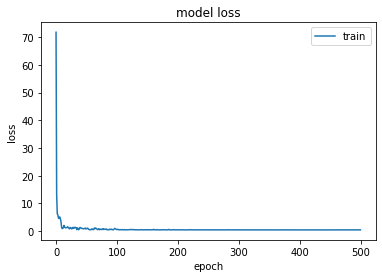

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

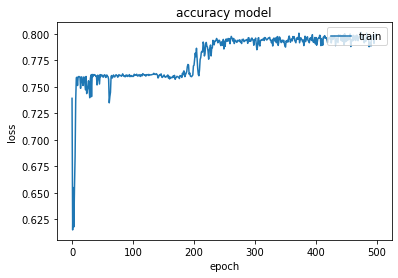

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('accuracy model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

#### RMSprop - 1 SALIDA

In [147]:
model = Sequential()
model.add(Dense(7, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [148]:
learning_rate = 0.009
optimizer = Adagrad(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [149]:
x_train = x_train.astype('float32')

In [150]:
# fit the keras model on the dataset
history = model.fit(x_train, y_train, epochs=500, batch_size=300)

Epoch 1/500
19/19 [==============================] - 1s 3ms/step - loss: 68.2219 - accuracy: 0.7300
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 36.9408 - accuracy: 0.7300
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 20.8288 - accuracy: 0.7291
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 11.1931 - accuracy: 0.7251
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 5.5271 - accuracy: 0.7130
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 1.6238 - accuracy: 0.5744
Epoch 7/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.4118
Epoch 8/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.3988
Epoch 9/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.3979
Epoch 10/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.4008
Epoch

KeyboardInterrupt: ignored

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

45/45 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8133
Accuracy: 81.33


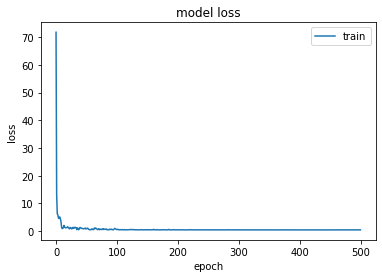

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

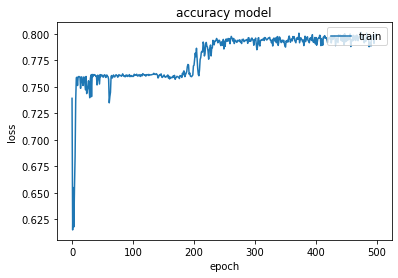

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('accuracy model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()